In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline 
sns.set(color_codes=True)

In [64]:
df_train = pd.read_csv('train_wine.csv')
df_test = pd.read_csv('test_wine.csv')
df_ss = pd.read_csv('sample_submission.csv')

df_test = pd.merge(df_test, df_ss, on='id')
df = df_train.copy()

In [65]:
df_test.head()

,id,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,chlorides,...,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol,class
0,4356,white,D,6.9,3.067206,0.22,4.801635,0.49,7.0,0.063,...,50.0,I2,168.0,0.99570,3.54,2.16,0.50,0.24,10.3,good
1,4357,white,E,7.2,3.636035,0.27,3.346669,0.42,1.6,0.050,...,35.0,I1,135.0,0.99200,2.94,2.91,0.46,0.24,11.0,good
2,4358,white,D,7.6,3.304237,0.27,3.254801,0.30,9.2,0.018,...,23.0,I1,96.0,0.99380,3.08,2.18,0.29,0.24,11.0,good
3,4359,white,D,7.2,3.755322,0.34,1.649586,0.30,8.4,0.051,...,40.0,I1,167.0,0.99756,3.48,2.29,0.62,0.24,9.7,medium
4,4360,red,E,7.1,2.800327,0.34,2.010788,0.28,2.0,0.082,...,31.0,I1,68.0,0.99694,3.45,2.20,0.48,0.24,9.4,medium


In [3]:
df_train.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,medium,red,E,9.5,3.559427,0.59,2.411605,0.44,2.3,...,e2,21.0,I1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,good,red,C,6.4,3.131123,0.57,1.752449,0.12,2.3,...,g1,25.0,I1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,good,white,C,6.3,2.893981,0.23,2.299379,0.33,6.9,...,e3,23.0,I2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,good,red,D,7.2,2.311189,0.37,2.293916,0.32,2.0,...,i2,15.0,S1,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,medium,white,E,5.9,3.185586,0.44,3.215821,0.33,1.2,...,d2,12.0,I1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


In [4]:
df_train.dtypes

id                        int64
class                    object
color                    object
vineyard                 object
fixed.acidity           float64
acid.sulfur             float64
volatile.acidity        float64
sulfur.taste            float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
chlor.class              object
free.sulfur.dioxide     float64
condition                object
total.sulfur.dioxide    float64
density                 float64
pH                      float64
acid.taste              float64
sulphates               float64
acidity.variance        float64
alcohol                 float64
dtype: object

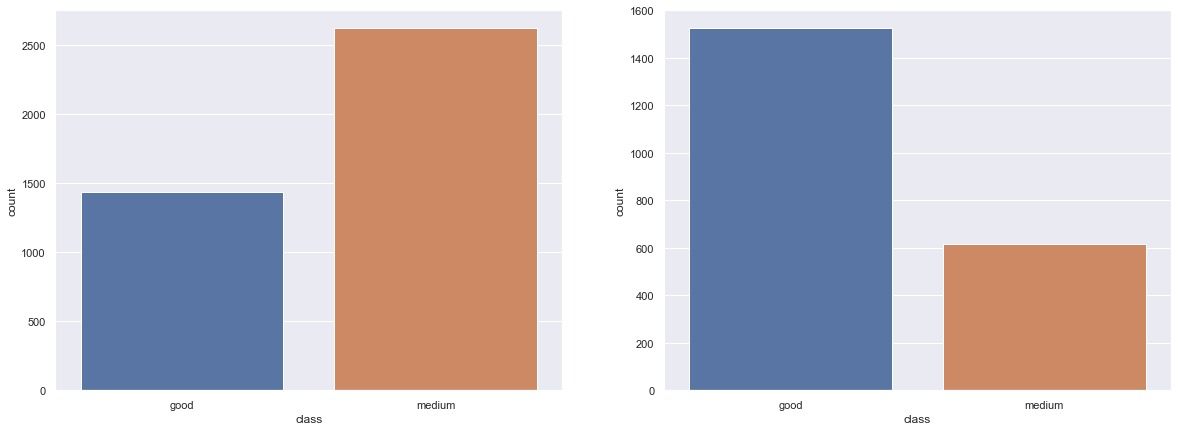

In [5]:
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=True)
sns.countplot(x = 'class',data = df_train, ax=axes[0])
sns.countplot(x = 'class',data = df_ss, ax=axes[1])

#### Encoding class features, so these ones which type is an object.

In [6]:
from sklearn import preprocessing
df = df_train.copy()

labelencoders = {}
for o in df_train.select_dtypes('object').columns:
    labelencoders[o] = preprocessing.LabelEncoder()
    labelencoders[o].fit(df[o].unique())
    print('------------ '+o+' ------------')
    print(df[o].unique())
    print(labelencoders[o].transform(df[o].unique()))
    df[o] = labelencoders[o].transform(df_train[o].values)
    print('------------------------')


------------ class ------------
['medium' 'good' 'poor' 'excellent']
[2 1 3 0]
------------------------
------------ color ------------
['red' 'white']
[0 1]
------------------------
------------ vineyard ------------
['E' 'C' 'D' 'A' 'B']
[4 2 3 0 1]
------------------------
------------ chlor.class ------------
['e2' 'g1' 'e3' 'i2' 'd2' 'i1' 'd1' 'h1' 'f3' 'b2' 'i3' 'f1' 'c2' 'g3'
 'b1' 'e1' 'g2' 'f2' 'c1' 'b3' 'h3' 'h2' 'd3' 'c3']
[10 15 11 22  7 21  6 18 14  1 23 12  4 17  0  9 16 13  3  2 20 19  8  5]
------------------------
------------ condition ------------
['I1' 'I2' 'S1' 'S2' 'S3' 'P1' 'P2' 'E']
[1 2 5 6 7 3 4 0]
------------------------


In [8]:
df.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,2,0,4,9.5,3.559427,0.59,2.411605,0.44,2.3,...,10,21.0,1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,1,0,2,6.4,3.131123,0.57,1.752449,0.12,2.3,...,15,25.0,1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,1,1,2,6.3,2.893981,0.23,2.299379,0.33,6.9,...,11,23.0,2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,1,0,3,7.2,2.311189,0.37,2.293916,0.32,2.0,...,22,15.0,5,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,2,1,4,5.9,3.185586,0.44,3.215821,0.33,1.2,...,7,12.0,1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


#### Correlation matrix
Displaying correlation matrix for each feature and checking which ones has the biggest influence on the wine class.

alcohol                -0.379473
color                  -0.101465
free.sulfur.dioxide    -0.078976
citric.acid            -0.072700
sulfur.taste           -0.036649
pH                     -0.033551
sulphates              -0.028867
acidity.variance       -0.027221
id                     -0.016626
chlor.class            -0.013276
condition               0.008383
vineyard                0.018006
residual.sugar          0.021089
acid.sulfur             0.023454
total.sulfur.dioxide    0.024315
acid.taste              0.034170
fixed.acidity           0.075804
chlorides               0.176626
density                 0.254921
volatile.acidity        0.262451
class                   1.000000
Name: class, dtype: float64


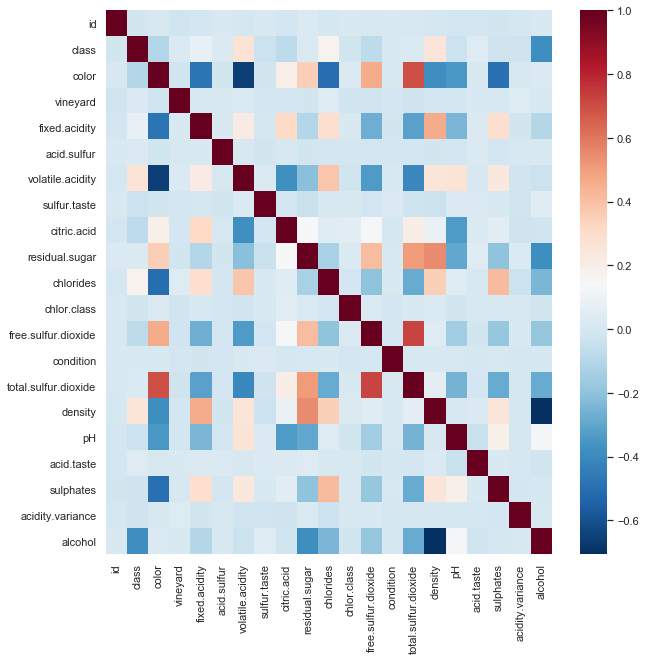

In [26]:
plt.figure(figsize=(10,10))
c= df.corr()
sns.heatmap(c, cmap="RdBu_r")
cor_matrix_sorted = c['class'].sort_values()
print(cor_matrix_sorted)


In [48]:
# labels of interes 
loi = cor_matrix_sorted[:4].index.tolist() + cor_matrix_sorted[-5:-1].index.tolist() + ['class']
print(loi)

['alcohol', 'color', 'free.sulfur.dioxide', 'citric.acid', 'fixed.acidity', 'chlorides', 'density', 'volatile.acidity', 'class']


In [52]:
df_train[loi].head()

,alcohol,color,free.sulfur.dioxide,citric.acid,fixed.acidity,chlorides,density,volatile.acidity,class
0,9.5,red,21.0,0.44,9.5,0.071,0.99920,0.59,medium
1,11.3,red,25.0,0.12,6.4,0.120,0.99519,0.57,good
2,10.4,white,23.0,0.33,6.3,0.052,0.99380,0.23,good
3,11.3,red,15.0,0.32,7.2,0.062,0.99470,0.37,good
4,11.5,white,12.0,0.33,5.9,0.049,0.99134,0.44,medium


### Data visualization

In this training dataset there is more red wines than white wines for each class .

class      color
excellent  white     119
           red        14
good       white    2054
           red       570
medium     white     985
           red       448
poor       white     123
           red        42
Name: color, dtype: int64


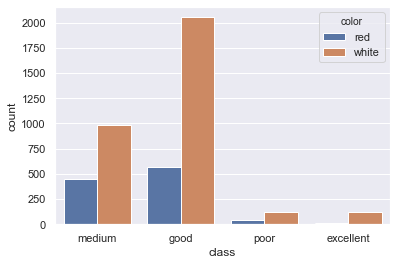

In [71]:
print((df_train.groupby('class')['color'].value_counts()))
sns.countplot(x="class", hue="color", data=df_train)

### Citric acid histogram
We can clearly see, that there are some outliers above value 0.8

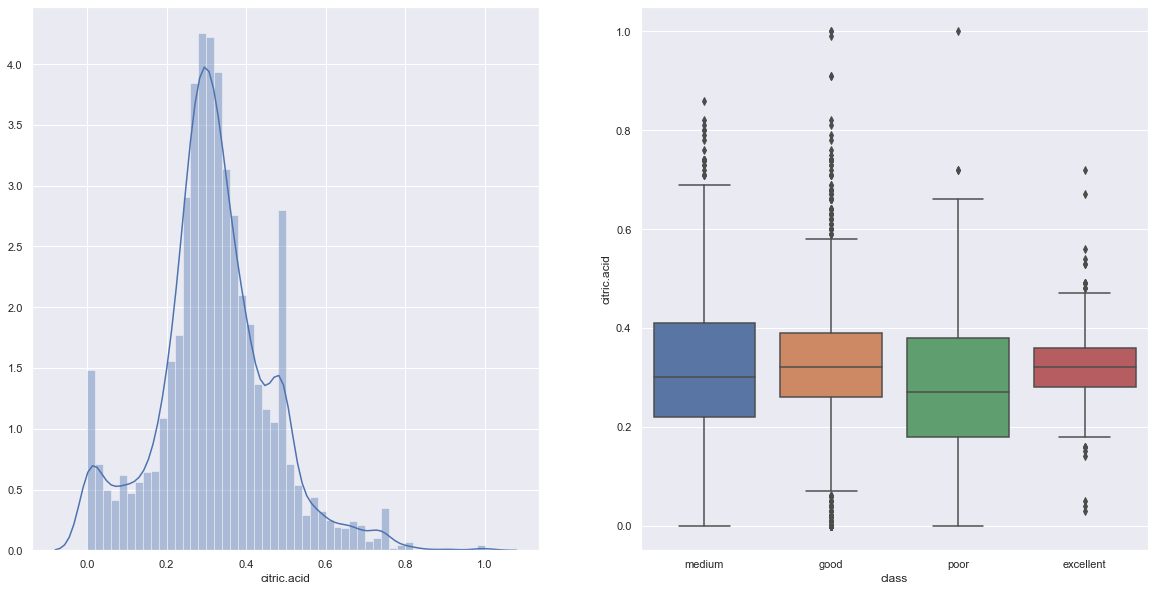

In [103]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['citric.acid'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'citric.acid', data=df_train, ax=axes[1])



### Alcohol distribution

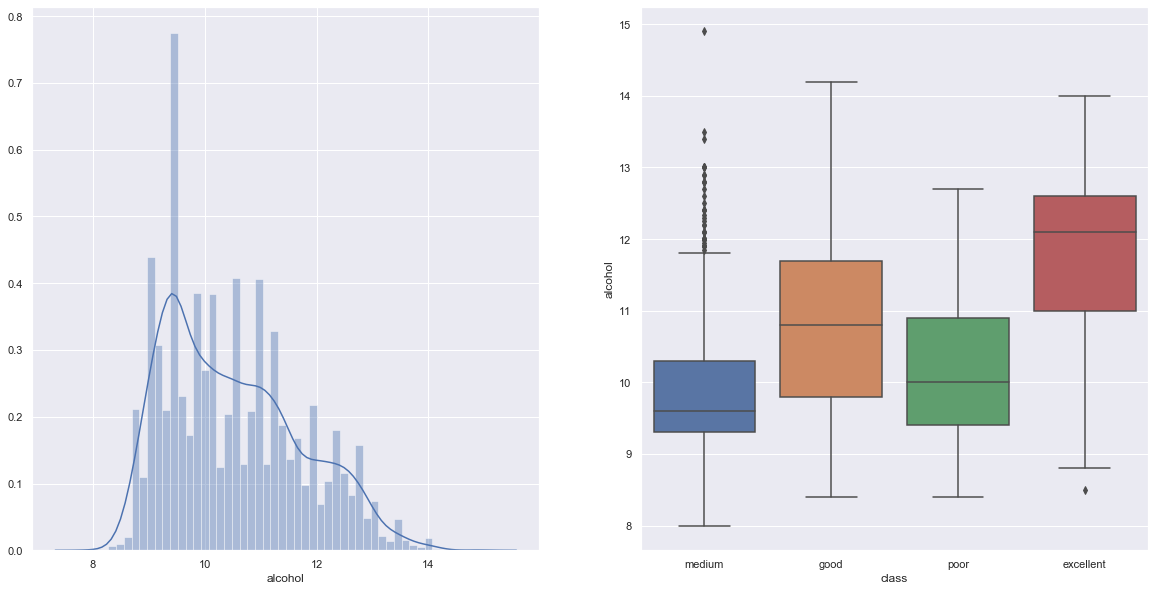

In [104]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['alcohol'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'alcohol', data=df_train, ax=axes[1])


### Free sulfur dioxide distribution

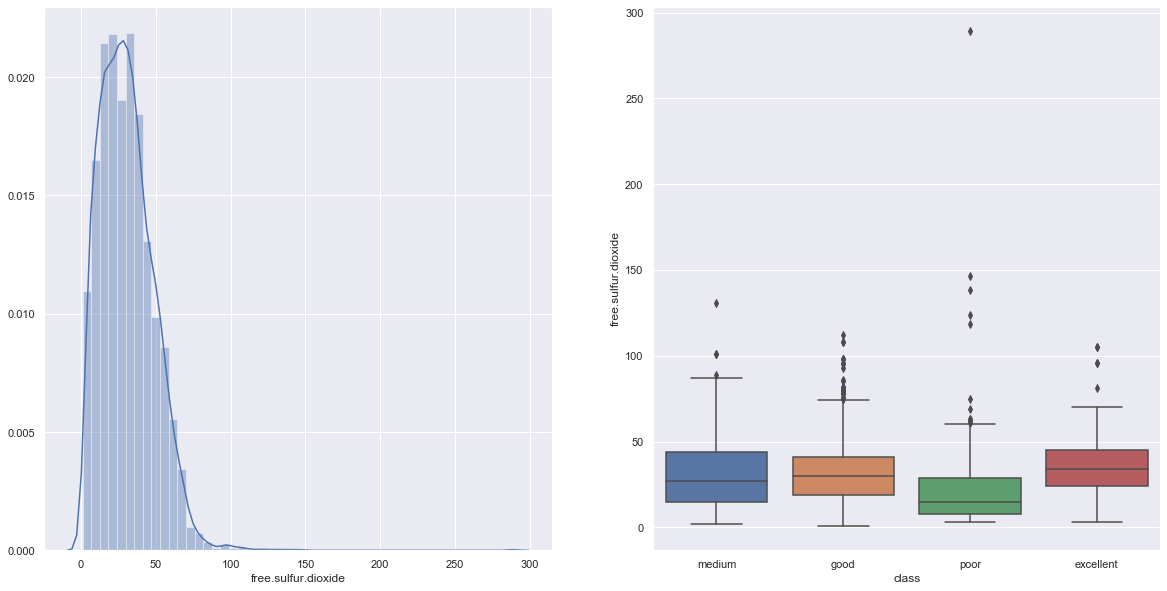

In [105]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['free.sulfur.dioxide'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'free.sulfur.dioxide', data=df_train, ax=axes[1])


### Fixed acidity distribution

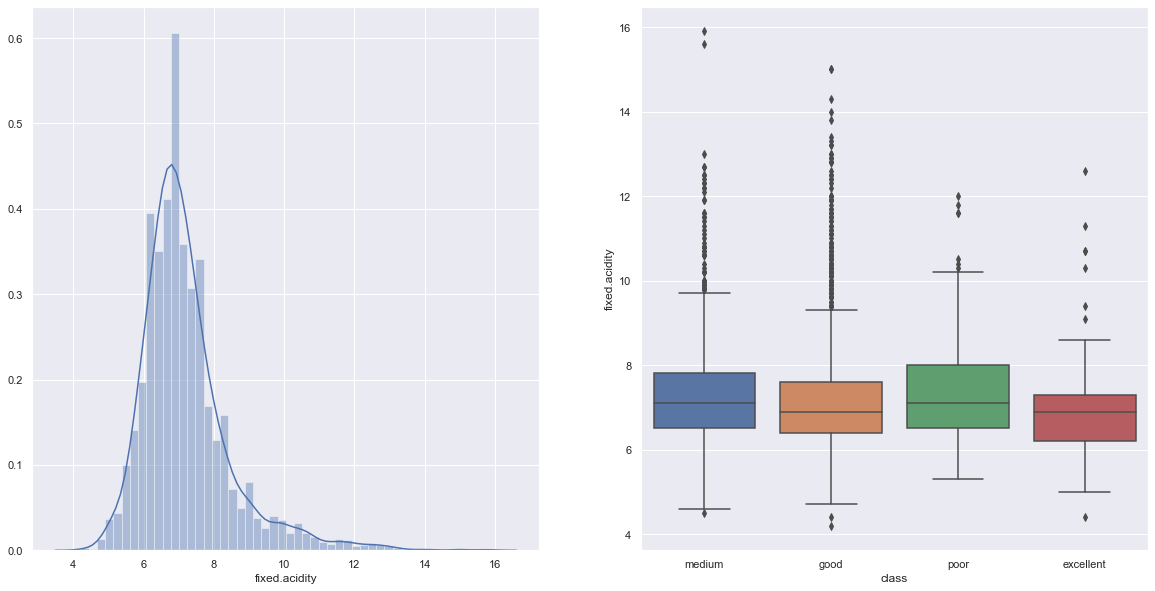

In [106]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['fixed.acidity'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'fixed.acidity', data=df_train, ax=axes[1])


### Density distribution

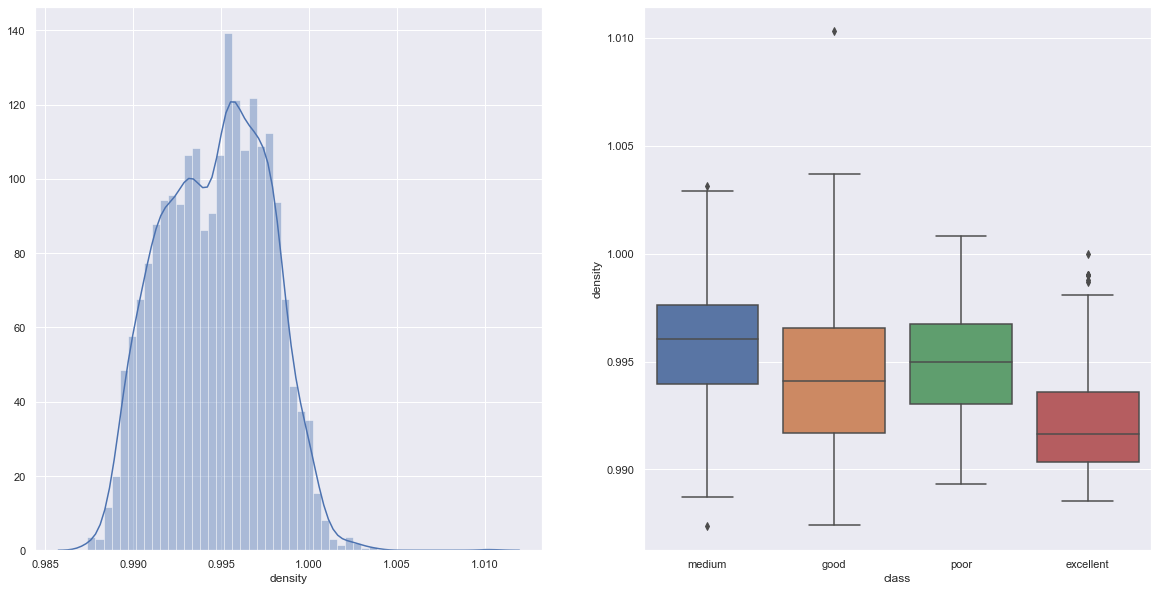

In [107]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['density'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'density', data=df_train, ax=axes[1])


### Volatile acidity distribution

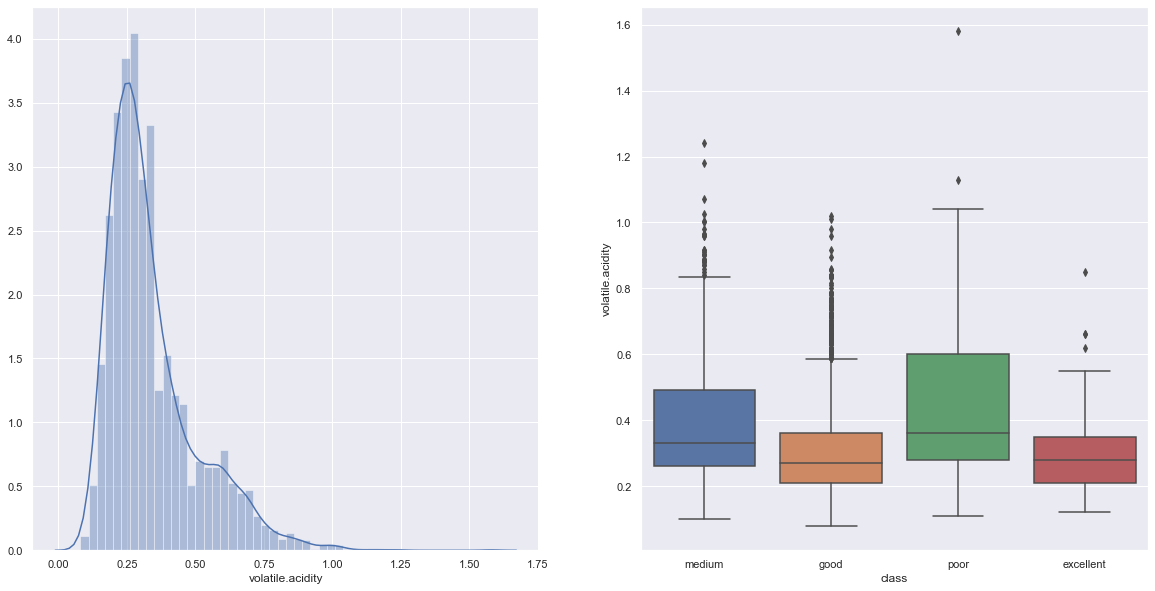

In [109]:
f, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.distplot(df_train['volatile.acidity'], bins=50, kde=True, ax=axes[0])
sns.boxplot('class', 'volatile.acidity', data=df_train, ax=axes[1])
